In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,1,2,3,4,5,6,7,8
abatement,0,7,0,0,0,0,0,0
ablaze,0,0,0,0,1,0,0,0
able,0,0,0,1,0,0,0,1
abridge,0,0,0,0,0,0,1,0
absence,0,0,0,0,1,0,1,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'1': [('confederate', 8),
  ('statues', 6),
  ('speaker', 5),
  ('house', 4),
  ('states', 4),
  ('state', 4),
  ('did', 4),
  ('slavery', 4),
  ('confederacy', 4),
  ('capitol', 3),
  ('served', 3),
  ('senate', 3),
  ('army', 3),
  ('congress', 3),
  ('men', 3),
  ('said', 3),
  ('mr', 3),
  ('went', 2),
  ('figures', 2),
  ('general', 2),
  ('blunt', 2),
  ('connection', 2),
  ('south', 2),
  ('thursday', 2),
  ('new', 2),
  ('robert', 2),
  ('displays', 2),
  ('booker', 2),
  ('georgia', 2),
  ('president', 2)],
 '2': [('police', 11),
  ('store', 11),
  ('stores', 10),
  ('abatement', 7),
  ('nuisance', 7),
  ('laws', 7),
  ('muslim', 7),
  ('shopkeepers', 6),
  ('lowincome', 6),
  ('new', 6),
  ('muslims', 6),
  ('grocery', 5),
  ('cup', 5),
  ('foods', 5),
  ('immigrant', 4),
  ('policing', 4),
  ('neighborhoods', 4),
  ('americans', 4),
  ('owners', 4),
  ('york', 4),
  ('racism', 4),
  ('crime', 3),
  ('nonblack', 3),
  ('communities', 3),
  ('africanamerican', 3),
  ('owner',

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

1
confederate, statues, speaker, house, states, state, did, slavery, confederacy, capitol, served, senate, army, congress
---
2
police, store, stores, abatement, nuisance, laws, muslim, shopkeepers, lowincome, new, muslims, grocery, cup, foods
---
3
black, rage, psalm, hope, justice, jesus, christians, police, lives, videos, video, christian, new, cross
---
4
police, officers, country, departments, law, riots, americans, force, want, like, justice, protesters, officer, bad
---
5
police, officers, court, justice, courts, immunity, rights, case, qualified, civil, cases, plaintiffs, law, starts
---
6
police, people, black, justice, racial, economic, like, nation, white, democracy, civil, violence, social, rights
---
7
police, protesters, officers, protect, violence, americans, press, city, im, protest, rights, leaders, mr, people
---
8
black, schools, health, video, racism, likely, public, white, racial, race, violence, half, study, said
---


In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['confederate',
 'statues',
 'speaker',
 'house',
 'states',
 'state',
 'did',
 'slavery',
 'confederacy',
 'capitol',
 'served',
 'senate',
 'army',
 'congress',
 'men',
 'said',
 'mr',
 'went',
 'figures',
 'general',
 'blunt',
 'connection',
 'south',
 'thursday',
 'new',
 'robert',
 'displays',
 'booker',
 'georgia',
 'president',
 'police',
 'store',
 'stores',
 'abatement',
 'nuisance',
 'laws',
 'muslim',
 'shopkeepers',
 'lowincome',
 'new',
 'muslims',
 'grocery',
 'cup',
 'foods',
 'immigrant',
 'policing',
 'neighborhoods',
 'americans',
 'owners',
 'york',
 'racism',
 'crime',
 'nonblack',
 'communities',
 'africanamerican',
 'owner',
 'customers',
 'businesses',
 'like',
 'use',
 'black',
 'rage',
 'psalm',
 'hope',
 'justice',
 'jesus',
 'christians',
 'police',
 'lives',
 'videos',
 'video',
 'christian',
 'new',
 'cross',
 'future',
 'resurrection',
 'time',
 'says',
 'reconciliation',
 'make',
 'bible',
 'oppressed',
 'death',
 'people',
 'disinherited',
 'man',
 'ques

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('police', 7),
 ('like', 5),
 ('violence', 5),
 ('new', 4),
 ('americans', 4),
 ('justice', 4),
 ('officers', 4),
 ('mr', 3),
 ('black', 3),
 ('people', 3),
 ('white', 3),
 ('rights', 3),
 ('said', 2),
 ('president', 2),
 ('racism', 2),
 ('use', 2),
 ('video', 2),
 ('death', 2),
 ('life', 2),
 ('law', 2),
 ('force', 2),
 ('protesters', 2),
 ('officer', 2),
 ('bad', 2),
 ('peaceful', 2),
 ('cops', 2),
 ('civil', 2),
 ('just', 2),
 ('racial', 2),
 ('social', 2),
 ('public', 2),
 ('confederate', 1),
 ('statues', 1),
 ('speaker', 1),
 ('house', 1),
 ('states', 1),
 ('state', 1),
 ('did', 1),
 ('slavery', 1),
 ('confederacy', 1),
 ('capitol', 1),
 ('served', 1),
 ('senate', 1),
 ('army', 1),
 ('congress', 1),
 ('men', 1),
 ('went', 1),
 ('figures', 1),
 ('general', 1),
 ('blunt', 1),
 ('connection', 1),
 ('south', 1),
 ('thursday', 1),
 ('robert', 1),
 ('displays', 1),
 ('booker', 1),
 ('georgia', 1),
 ('store', 1),
 ('stores', 1),
 ('abatement', 1),
 ('nuisance', 1),
 ('laws', 1),
 ('musl

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['police']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [16]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

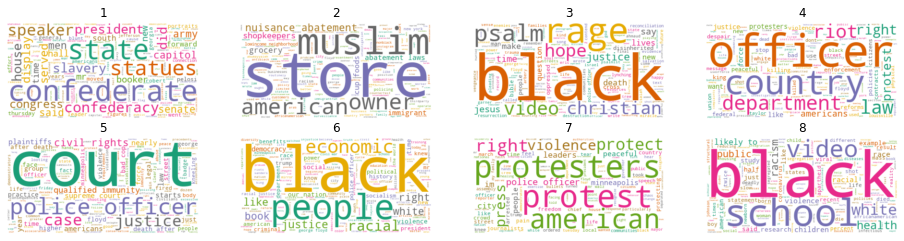

In [14]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['1', '2', '3', '4', '5', '6', '7', '8']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [15]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
0,1,266
7,8,339
1,2,365
2,3,393
4,5,424
3,4,438
6,7,495
5,6,895


In [21]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('police', 7),
 ('like', 5),
 ('violence', 5),
 ('new', 4),
 ('americans', 4),
 ('justice', 4),
 ('officers', 4),
 ('mr', 3),
 ('black', 3),
 ('people', 3),
 ('white', 3),
 ('rights', 3),
 ('said', 2),
 ('president', 2),
 ('racism', 2),
 ('use', 2),
 ('video', 2),
 ('death', 2),
 ('life', 2),
 ('law', 2),
 ('force', 2),
 ('protesters', 2),
 ('officer', 2),
 ('bad', 2),
 ('peaceful', 2),
 ('cops', 2),
 ('civil', 2),
 ('just', 2),
 ('racial', 2),
 ('social', 2),
 ('public', 2),
 ('confederate', 1),
 ('statues', 1),
 ('speaker', 1),
 ('house', 1),
 ('states', 1),
 ('state', 1),
 ('did', 1),
 ('slavery', 1),
 ('confederacy', 1),
 ('capitol', 1),
 ('served', 1),
 ('senate', 1),
 ('army', 1),
 ('congress', 1),
 ('men', 1),
 ('went', 1),
 ('figures', 1),
 ('general', 1),
 ('blunt', 1),
 ('connection', 1),
 ('south', 1),
 ('thursday', 1),
 ('robert', 1),
 ('displays', 1),
 ('booker', 1),
 ('georgia', 1),
 ('store', 1),
 ('stores', 1),
 ('abatement', 1),
 ('nuisance', 1),
 ('laws', 1),
 ('musl

In [38]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['white', 'black', 'muslim']]
data_profanity = pd.concat([data_bad_words.white + data_bad_words.black, data_bad_words.muslim], axis=1)
data_profanity.columns = ['w_word', 'b_word']
data_profanity

,w_word,b_word
1,2,0
2,3,7
3,12,0
4,5,0
5,2,0
6,26,0
7,6,0
8,14,0


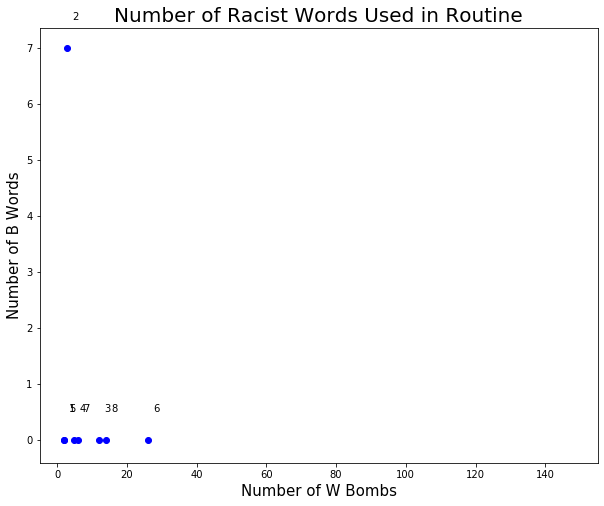

In [43]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, editorials in enumerate(data_profanity.index):
    x = data_profanity.w_word.loc[editorials]
    y = data_profanity.b_word.loc[editorials]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Racist Words Used in Routine', fontsize=20)
plt.xlabel('Number of W Bombs', fontsize=15)
plt.ylabel('Number of B Words', fontsize=15)

plt.show()